# Version 2

- Now has a switch for plotting all the images, or not.

- Does not read in the master files if they already exist.

- The histograms are now better and have 50 bins spread over a more useful range.

- Only divides by 16 for the ASI1600MM Camera.

- Improved file handling although it means the files have to be in the right place.

- 2//12/2023 PXS

Here I'll make my fist attempt to open and look at my own data. using the tutorisl from [here](https://learn.astropy.org/tutorials/FITS-images.html)

In [1]:
import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from astropy.io import fits
from astropy.utils.data import download_file

import os
import glob
import time
from matplotlib.colors import LogNorm
from IPython import display
from IPython.display import clear_output
import random

plt.rcParams.update({'font.size':15})

In [2]:
plot_images = True
plot_images = False

Next want to grab all the file names in a sub-folder. I'm using glob to do it as it saves me typing in the file names by hand.

In [74]:
file_object = "HeartNebula"
file_night  = "2023_11_30_apo"

In [75]:
file_object  = "tyc_3023-1974-1"

file_night  = "2023_04_02"
file_night  = "2023_04_03"
file_night  = "2023_04_19"

In [76]:
file_object = "RZ_Cas"
file_night  = "2023_03_02"
#file_night  = "2023_04_06"
file_night  = "2023_10_14"
file_night  = "2023_11_30"

In [150]:
file_object = "RZ_Cep"
file_night  = "2022_12_07"
file_night  = "2023_01_23"
file_night  = "2023_02_23"
file_night  = "2023_11_10"
file_night  = "2024_01_07"
file_night  = "2024_01_18"

In [151]:
filepath     = "../../BPO_Data/"+file_object+"/"+file_night+"/Dark/"
biasfilepath = "../../BPO_Data/"+file_object+"/"+file_night+"/Bias/master_bias.fits"

In [152]:
image_list = []
n = 0

for file in glob.glob(filepath+"*Dark*.fits"): #The 'D' stops it picking up past master_frames
    if "master" in file: 
       print("will ignore previous master output")
    else:
    
        image_list.append(file)
        n=n+1
print("\n".join(image_list))

will ignore previous master output
will ignore previous master output
../../BPO_Data/RZ_Cep/2024_01_18/Dark\Dark_50_secs_001.fits
../../BPO_Data/RZ_Cep/2024_01_18/Dark\Dark_50_secs_002.fits
../../BPO_Data/RZ_Cep/2024_01_18/Dark\Dark_50_secs_003.fits
../../BPO_Data/RZ_Cep/2024_01_18/Dark\Dark_50_secs_004.fits
../../BPO_Data/RZ_Cep/2024_01_18/Dark\Dark_50_secs_005.fits
../../BPO_Data/RZ_Cep/2024_01_18/Dark\Dark_50_secs_006.fits
../../BPO_Data/RZ_Cep/2024_01_18/Dark\Dark_50_secs_007.fits
../../BPO_Data/RZ_Cep/2024_01_18/Dark\Dark_50_secs_008.fits
../../BPO_Data/RZ_Cep/2024_01_18/Dark\Dark_50_secs_009.fits
../../BPO_Data/RZ_Cep/2024_01_18/Dark\Dark_50_secs_010.fits
../../BPO_Data/RZ_Cep/2024_01_18/Dark\Dark_50_secs_011.fits
../../BPO_Data/RZ_Cep/2024_01_18/Dark\Dark_50_secs_012.fits
../../BPO_Data/RZ_Cep/2024_01_18/Dark\Dark_50_secs_013.fits
../../BPO_Data/RZ_Cep/2024_01_18/Dark\Dark_50_secs_014.fits
../../BPO_Data/RZ_Cep/2024_01_18/Dark\Dark_50_secs_015.fits
../../BPO_Data/RZ_Cep/2024_01_

In [153]:
image_concat = []

image_concat = [fits.getdata(image) for image in image_list]

hdu_number = 0 # HDU means header data unit
image_hdr = [fits.getheader(image, hdu_number) for image in image_list]

In [154]:
N_images = np.shape(image_concat)
print(N_images) #shape of array, imagex X y-pixels X x-pixels
print(N_images[0]) #number of images

image_concat[0]

(25, 3520, 4656)
25


array([[112, 176, 112, ..., 144, 224,  96],
       [112, 176,  16, ..., 144, 160, 112],
       [160, 128, 160, ..., 144, 256, 128],
       ...,
       [128, 144, 144, ..., 112, 208, 176],
       [112, 160, 160, ...,  80, 192, 128],
       [144,  96, 144, ..., 128, 192, 128]], dtype=uint16)

The ZWo amera is 12 bit, but it sclaes the output to 16 bit, so a 2^4=16 difference. We need ot rmeove that

In [155]:
if image_hdr[0]['INSTRUME'] == 'ZWO CCD ASI1600MM Pro':
    for i in range(N_images[0]):
        image_concat[i] = image_concat[i] /16

    print("Divided by 16")

Divided by 16


Now get ready to subtract off the appropraite master bias image from each

In [156]:
masterbias_image = fits.getdata(biasfilepath)

Min: 4.0
Max: 25.03846153846154
Mean: 7.239626549151565
Median 7.230769230769231
Stdev: 0.36659481867654925


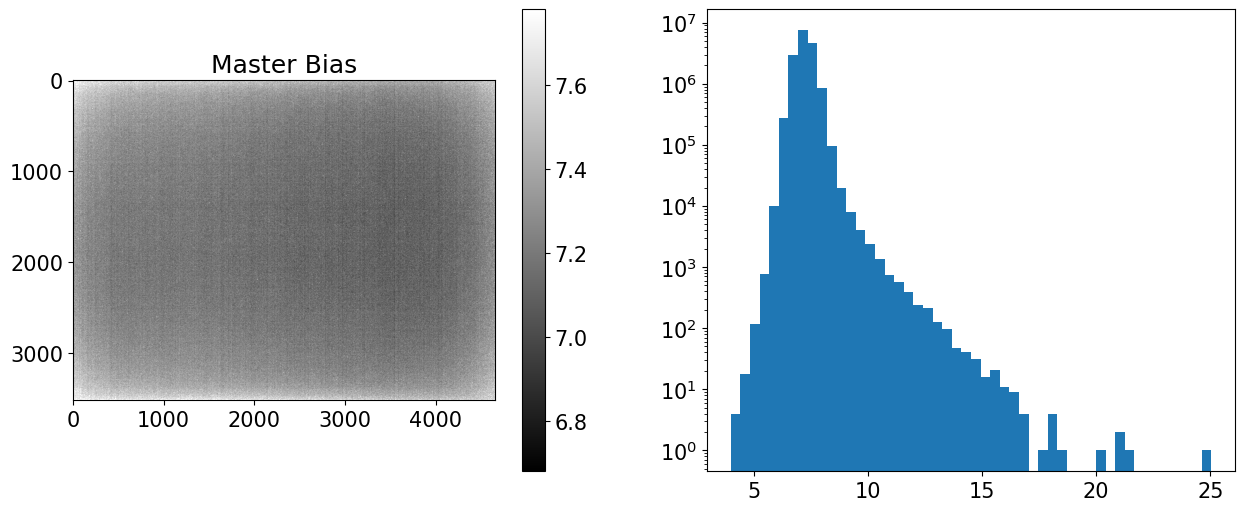

In [157]:
plt.figure(figsize=(15,6))

N_std = 1.5

print('Min:', np.min(masterbias_image) )
print('Max:', np.max(masterbias_image)  )    
print('Mean:', np.mean(masterbias_image)  )
print('Median', np.median(masterbias_image)  )
print('Stdev:', np.std(masterbias_image)  )

plt.subplot(1,2,1)
plt.imshow(masterbias_image, cmap='gray', 
               vmin= np.median(masterbias_image) - N_std*np.std(masterbias_image), vmax=np.median(masterbias_image) + N_std*np.std(masterbias_image)) 
plt.title("Master Bias")
plt.colorbar()


plt.subplot(1,2,2)
plt.hist(masterbias_image.flatten(),bins=50)
plt.yscale('log')
  
plt.show()

In [158]:
for i in range(N_images[0]):
    image_concat[i] = image_concat[i] - masterbias_image

In [159]:
image_hdr[0]

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4656 / length of data axis 1                          
NAXIS2  =                 3520 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
ROWORDER= 'TOP-DOWN'           / Row Order                                      
INSTRUME= 'ZWO CCD ASI1600MM Pro' / CCD Name                                    
TELESCOP= 'SynScan '        

In [160]:
for n in range(N_images[0]):
    camera_temp = image_hdr[n]["CCD-TEMP"]
    print('Camera temp = ',str(camera_temp), ' C')

Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C
Camera temp =  -20.0  C


In [161]:
for n in range(N_images[0]):
    exposure = image_hdr[n]["EXPTIME "]
    print('Dark Exposure time= ',str(exposure))

Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0
Dark Exposure time=  50.0


Lets just check we now have a 3D arrany of data: photo number, y-pixels and x-pixels

Make various arrays of zeros so I can store various stat things about each of the images.

In [162]:
image_min = np.zeros(N_images[0])
image_max = np.zeros(N_images[0])
image_mean = np.zeros(N_images[0])
image_median = np.zeros(N_images[0])
image_stdev = np.zeros(N_images[0])

Now cycle through each image, plot, work out some stats of each image and a histrogram. This is the first chance to see if there are any dodgy images that once identified can be cut from the original directory if required. Maybe htere is a satelite, or a off flash or a UFO. 

To make the plots below look ok, we spread the gray scale from the mean $\pm$ some number of standard deviations. You can play with that number to make the plots more useful. Here I've stuck with a linear scale, but you can set to log if you wish.

In [163]:
N_std = 0.2


for i in range(N_images[0]):
    clear_output(wait=True)
    
    print(image_list[i])
    image_min[i] = np.min(image_concat[i])
    image_max[i] = np.max(image_concat[i])
    image_mean[i] = np.mean(image_concat[i])
    image_median[i] = np.median(image_concat[i])
    image_stdev[i] = np.std(image_concat[i])

    
    
    print('Min:', image_min[i] )
    print('Max:', image_max[i] )    
    print('Mean:', image_mean[i] )
    print('Median', image_median[i] )
    print('Stdev:', image_stdev[i] )

    if plot_images == True:
    
        plt.figure(figsize=(15,6))
        plt.subplot(1,2,1)
        plt.imshow(image_concat[i], cmap='gray', 
                   vmin= image_mean[i] - N_std*image_stdev[i], vmax=image_mean[i] + N_std*image_stdev[i]) 
        plt.title("Image "+ str(i))
        plt.colorbar()


        plt.subplot(1,2,2)
        plt.hist(image_concat[i].flatten(),bins=int(image_max[i]))
        plt.yscale('log')

        plt.show()

        time.sleep(1) #pause in secs. Make bigger if you need.


../../BPO_Data/RZ_Cep/2024_01_18/Dark\Dark_50_secs_025.fits
Min: -18.03846153846154
Max: 4086.846153846154
Mean: 1.5929698928782785
Median 1.5769230769230766
Stdev: 2.652940346767959


Let's plot some of the stats we've just worked out

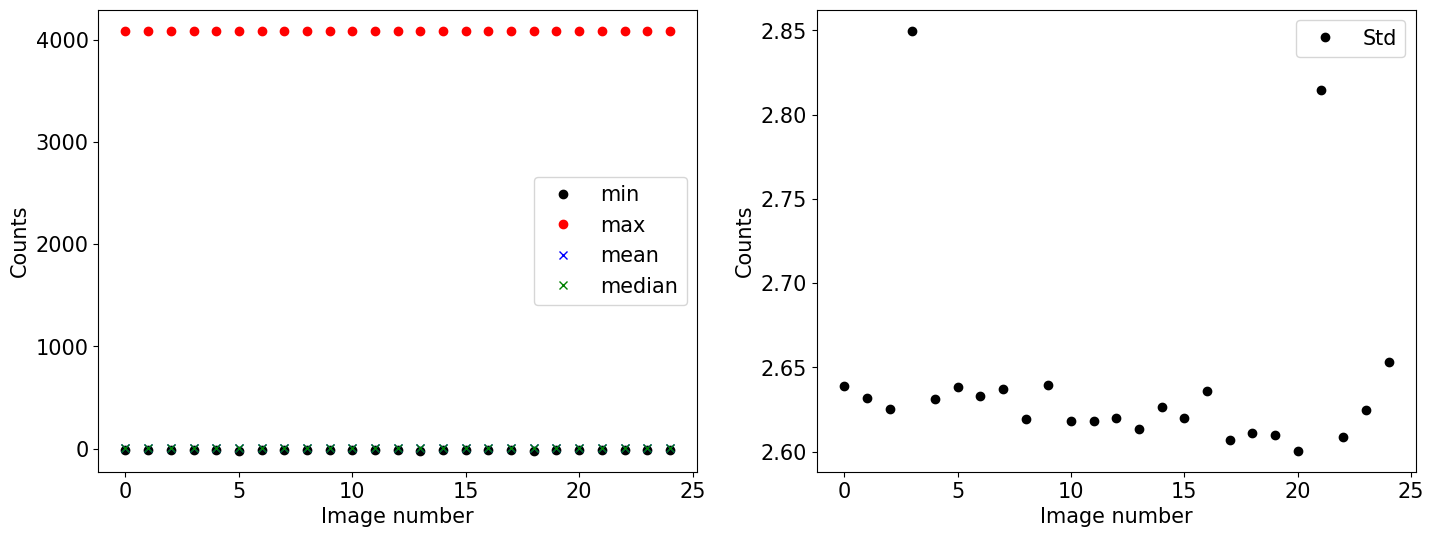

In [164]:
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
plt.plot(image_min,'ko',label='min')
plt.plot(image_max,'ro',label='max')
plt.plot(image_mean, 'bx', label='mean')
plt.plot(image_median,'gx',label='median')

plt.xlabel('Image number')
plt.ylabel('Counts')

plt.legend()


plt.subplot(1,2,2)
plt.plot(image_stdev,'ko',label='Std')

plt.xlabel('Image number')
plt.ylabel('Counts')

plt.legend()



plt.show()



Note, offentimes in the above image stats anaylysi the mean and hte median are nearly identical. And note that I think the np.ted returns the standard deviation of the inputs, not the standard deviation of the mean. Hence the second figure of the std will be $\pm$ something and not some tiny number.

Right now we can get onto the pixel by pixel analysis. Unlike the stuff above, which is per image, we care about per pixel. Given there are a few bias frames, it is as if we have measured the bias value of a pixel N times. So that's what we want to look at.

Let's do for 1 pixel first and build from there.

We'll also create a new array which is just a plain 3D array of integers so we can easily to maths across all images.

In [165]:
all_data = np.zeros(N_images)
for i in range(N_images[0]):
    all_data[i,:,:] = image_concat[i]

In [166]:
NyPix = np.shape(all_data)[1]
NxPix = np.shape(all_data)[2]
print(NxPix,NyPix)

4656 3520


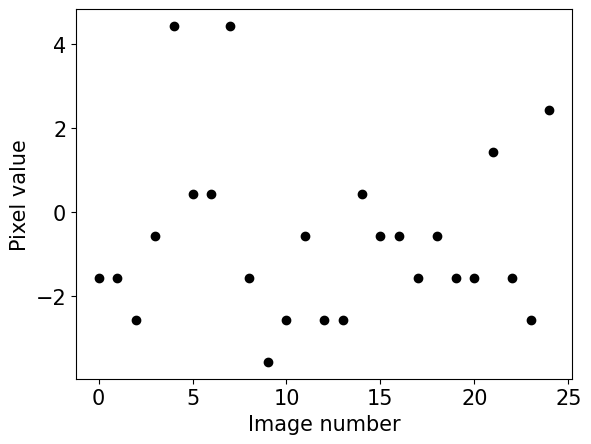

In [167]:
x = int(random.randint(1, NxPix))
y = int(random.randint(1, NyPix))

plt.plot(all_data[:,y,x],'ko' )

plt.xlabel('Image number')
plt.ylabel('Pixel value')

plt.show()

So there is some variation due to the inherent noise on the bias and the noise introduced by reading the image as well. Let's plot a few of these just to see what they look like. If I was being really good I'd randommly select some pixels, but I can't be bothered.

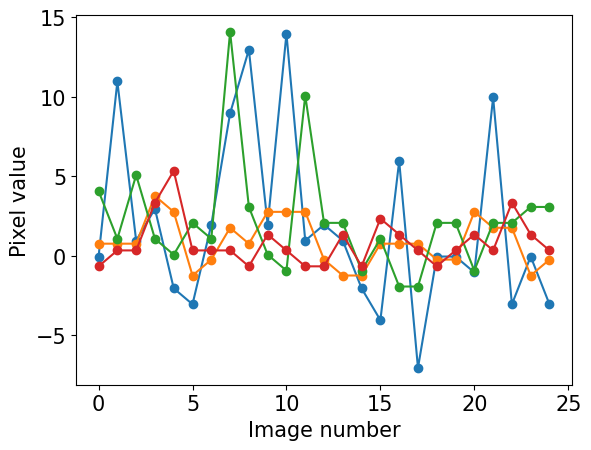

In [168]:
x_list = np.zeros(4)
y_list =  np.zeros(4)
x_list = [random.randint(1, NxPix),random.randint(1, NxPix),random.randint(1, NxPix),random.randint(1, NxPix)]
y_list = [random.randint(1, NyPix),random.randint(1, NyPix),random.randint(1, NyPix),random.randint(1, NyPix)]

for i in range(4):
    plt.plot(all_data[:,y_list[i],x_list[i]],'-o')



plt.xlabel('Image number')
plt.ylabel('Pixel value')

plt.show()

So we can see for these there is a similar distribution for each pixel. Now let's work out the standard deviation, since we have a nice 3D array this should be easy to do. Since our first dimension 0 is the image number that's what we want to compute over 

In [169]:
pixels_std = np.std(all_data, axis=0)

In [170]:
np.shape(pixels_std)

(3520, 4656)

So we now have a new array where each entry if the std of the bias over the N bias images pixel by pixel. Let's have a quick look at it as a histogram.

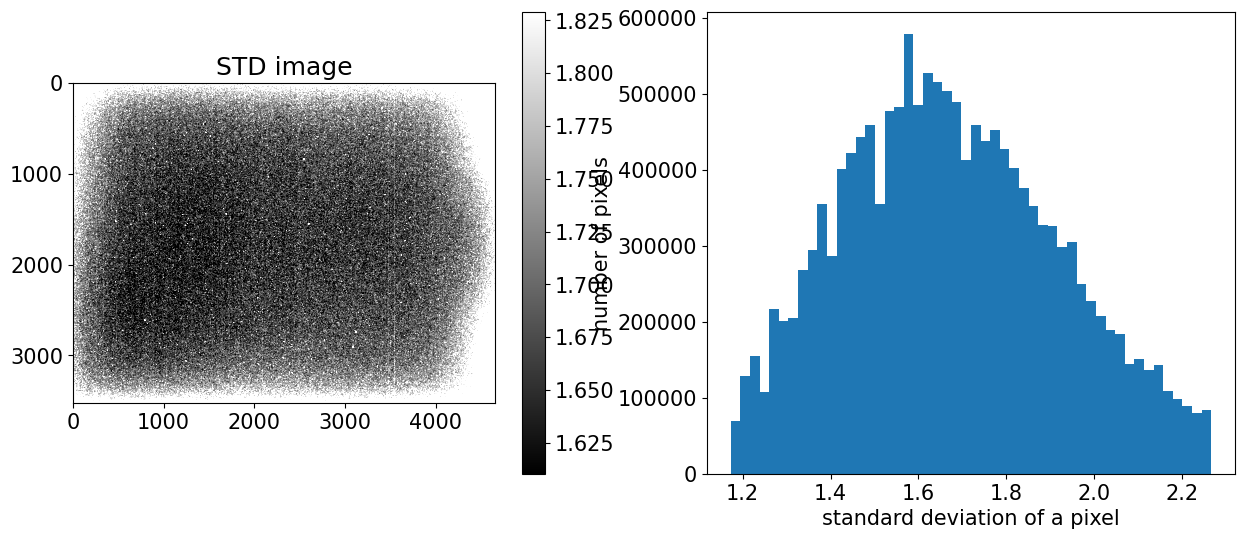

In [171]:
plt.figure(figsize=(15,6))

std_mean = np.mean(pixels_std)
std_std = np.std(pixels_std)

Vmin = std_mean - N_std*std_std 
Vmax = std_mean + N_std*std_std

plt.subplot(1,2,1)
plt.imshow(pixels_std, cmap='gray',
           vmin= Vmin, vmax=Vmax)
plt.title("STD image")
plt.colorbar()

plt.subplot(1,2,2)

Vmin = std_mean - 5*N_std*std_std 
Vmax = std_mean + 5*N_std*std_std

plt.hist(pixels_std.flatten(),bins=50,range=(Vmin,Vmax))
plt.xlabel('standard deviation of a pixel')
plt.ylabel('number of pixels')


plt.show()


So I think we're in a position to compute the overall uncertainty on a raw bias value, the measn across all of the above values.

In [172]:
Uncertainty_dark = np.median(pixels_std)
print(Uncertainty_dark)

1.673320053068151


From the manual of the [camera](https://moodle.bath.ac.uk/pluginfile.php/2010269/mod_resource/content/1/ZWO_ASI1600_Manual_EN.pdf) we can see that at the gain we use of 139 then we can read off that the read-noise should be 1.7 counts.

If the exposure was very short than this is probably quite like a bias-frame and hence we may find the dark-current is zero and the noise is the same as the read noise.

In [173]:
print('Dark uncertainty: {0:.2f} counts'.format(Uncertainty_dark))


Dark uncertainty: 1.67 counts


For fun let's make a master dark using the median of values pixel by pixel.

In [174]:
master_dark = np.median(all_data, axis=0)

Min: -15.03846153846154
Max: 4086.846153846154
Mean: 1.5554238867473817
Median 1.5769230769230766
Stdev: 1.9658259788575987
Total sum: 25492028.73076925


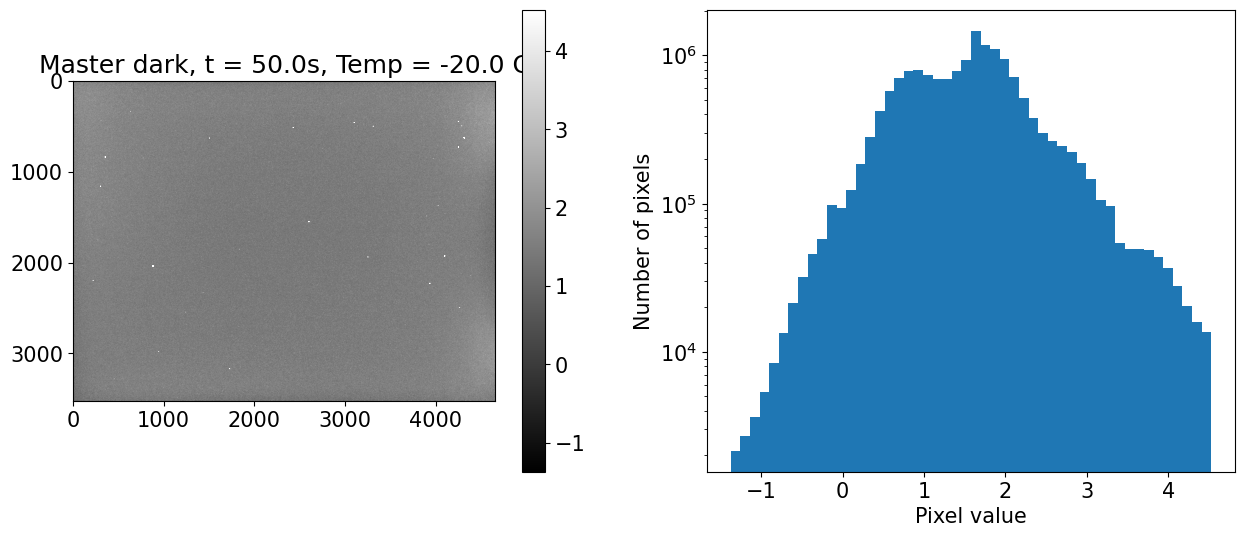

In [175]:
plt.figure(figsize=(15,6))
            
    
N_std = 1.5
    
print('Min:', np.min(master_dark) )
print('Max:', np.max(master_dark)  )    
print('Mean:', np.mean(master_dark)  )
print('Median', np.median(master_dark)  )
print('Stdev:', np.std(master_dark)  )
print('Total sum:',np.sum(master_dark))

Vmin = np.median(master_dark) - N_std*np.std(master_dark) 
Vmax = np.median(master_dark) + N_std*np.std(master_dark) 
    
plt.subplot(1,2,1)
plt.imshow(master_dark, cmap='gray', 
               vmin= Vmin, vmax=Vmax) 
plt.title('Master dark, t = '+str(exposure)+'s, Temp = '+str(camera_temp)+' C' )
plt.colorbar()


plt.subplot(1,2,2)
#plt.hist(master_dark.flatten(),bins= int(np.max(master_dark)))

plt.hist(master_dark.flatten(),range=(Vmin, Vmax),bins=50)
plt.yscale('log')
plt.xlabel('Pixel value')
plt.ylabel('Number of pixels')
  
plt.show()
    


So we can see by companing with the individual plots above that the image is much smoother. Since the uncertainty on each pixel is now smaller by $\sqrt{N}$ with $N$ the number of images that go into the master bias

We should divide by the exposure time so we have a master dark per second image. Much easier to work wiht later on. Should be our standard.

In [176]:
outfile = filepath+'master_dark.fits'

hdu = fits.PrimaryHDU(master_dark)
hdu.writeto(outfile, overwrite=True)

Now to be super useful, lets save the interesting stats to a datafram and so to a .csv file, so we can do some proper stats on stuff.

In [177]:
stats_data = np.zeros([N_images[0]+2,5])
stats_data[0:N_images[0],0] = image_min
stats_data[0:N_images[0],1] = image_max
stats_data[0:N_images[0],2] = image_mean
stats_data[0:N_images[0],3] = image_median
stats_data[0:N_images[0],4] = image_stdev


# Add master stats at the end
stats_data[-1,0] = np.min(master_dark)
stats_data[-1,1] = np.max(master_dark)
stats_data[-1,2] = np.mean(master_dark)
stats_data[-1,3] = np.median(master_dark)
stats_data[-1,4] = np.std(master_dark)

# Add  stats image at the end
stats_data[-2,0] = np.min(pixels_std)
stats_data[-2,1] = np.max(pixels_std)
stats_data[-2,2] = np.mean(pixels_std)
stats_data[-2,3] = np.median(pixels_std)
stats_data[-2,4] = np.std(pixels_std)

df_stats = pd.DataFrame(data=stats_data,columns=['min','max','mean','median','std'])

In [178]:
image_list.append(filepath+'std_image')
image_list.append(filepath+'master_dark.fits')

df_stats['filename'] = image_list

In [179]:
camera_temp = []
exposure = []
camera_filter = []

FILTER  = 'Luminance'

for n in range(N_images[0]):
    camera_temp.append(image_hdr[n]["CCD-TEMP"])
    exposure.append(image_hdr[n]["EXPTIME "])
    camera_filter.append(image_hdr[n]["FILTER "])

# need to do something for the std and master images etc.

mean_temp = np.mean(camera_temp)
mean_exposure = np.mean(exposure)


camera_temp.append(mean_temp)
camera_temp.append(mean_temp)
exposure.append(mean_exposure)
exposure.append(mean_exposure)
camera_filter.append(image_hdr[n]["FILTER "])
camera_filter.append(image_hdr[n]["FILTER "])

df_stats['Temp'] = camera_temp
df_stats['Exposure/s'] = exposure
df_stats['Filter '] = camera_filter

In [180]:
what_list = []
for i in range(N_images[0]):
    what_list.append('dark')
    
what_list.append('Std_image')
what_list.append('master')



# Make column of "what"
df_stats['what'] = what_list

In [181]:
df_stats.to_csv(filepath+'dark_stats.csv') #write to file.

For ease of use we'll also produce a per second dark master so it can be sclaed to any value below whatever the original exposure was. Never scale over this as you'll just be scaning noise!

In [182]:
exposures = np.zeros(N_images[0])

for n in range(N_images[0]):
    exposures[n] = image_hdr[n]["EXPTIME "]
print(exposures)

[50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50.]


In [183]:
outfile = filepath+'master_dark_per_sec.fits'

hdu = fits.PrimaryHDU(master_dark/np.mean(exposures))
hdu.writeto(outfile, overwrite=True)